In [9]:
!pip install connectivipy

  Created wheel for connectivipy: filename=connectivipy-0.36-cp36-none-any.whl size=23689 sha256=122775ced573c7cc25d41c786dd431aeb8a6610f24b827680dbdbd7fed17f201
  Stored in directory: /home/banusha/.cache/pip/wheels/83/fd/d8/e1700c85ae7e9fecd3c572e9d4cb9f62b0568f7e962dd19402
Successfully built connectivipy


In [ ]:
!pip install pyEDFlib

In [10]:
import numpy as np
import pyedflib
import pandas as pd
import connectivipy as cp

In [2]:
file_name= 'S038R01.edf'

In [3]:
def read_data_file(file):
    f = pyedflib.EdfReader(file)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    #data=pd.DataFrame(sigbufs).T
    #data.columns=signal_labels
    return signal_labels,sigbufs

In [27]:
labels, data = read_data_file(file_name)

(mandatory) Estimate functional brain connectivity among 64 channels using one of the
MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF). Select
one relevant frequency value. Apply a threshold so that the resulting binary connectivity
matrices have network density equal to 20%. Create a graphical representation of the binary
adjacency matrix.

https://connectivipy.readthedocs.io/en/latest/tutorial.html

In [7]:
len(labels)

64

In [8]:
data.shape

(64, 9760)

In [43]:
dt = cp.Data(data, fs=1., chan_names=labels, data_info='sml')

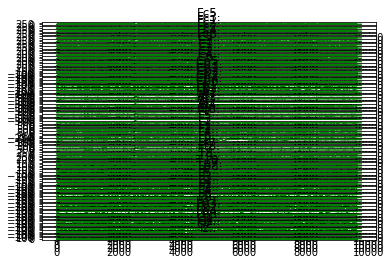

In [44]:
dt.plot_data(trial=0)

In [45]:
dt.fit_mvar(2, 'yw')

In [46]:
ar, vr = dt.mvar_coefficients

In [47]:
ar.shape

(2, 64, 64)

In [48]:
vr.shape

(64, 64)

In [49]:
gdtf_values = dt.conn('gdtf')

In [50]:
gdtf_values.shape

(100, 64, 64)

In [51]:
gdtf_significance = dt.significance(Nrep=200, alpha=0.05)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . |


In [53]:
gdtf_significance.shape

(64, 64)

In [54]:
gdtf_significance

array([[0.99659519, 0.05987315, 0.04011316, ..., 0.04365188, 0.06115418,
        0.07182671],
       [0.06923154, 0.99558037, 0.05132443, ..., 0.04292338, 0.06809426,
        0.07222548],
       [0.03937457, 0.0448218 , 0.9946884 , ..., 0.04636174, 0.05294252,
        0.05356749],
       ...,
       [0.03676697, 0.04284481, 0.04977774, ..., 0.99659383, 0.04418922,
        0.04655538],
       [0.06694298, 0.06871379, 0.03819665, ..., 0.04163994, 0.99542971,
        0.07387822],
       [0.0712399 , 0.08172545, 0.04529013, ..., 0.04147566, 0.08480622,
        0.99822062]])

In [96]:
np.sum(gdtf_significance>0.082)-64

840

In [97]:
adj_matr = 1*(gdtf_significance>0.082)

In [99]:
(np.sum(adj_matr)-64)/(64**2) # density of network

0.205078125